# Data Science Hackathon:
Ecommerce Product Categorization

# Step 1: Importing necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Step 2: Loading the dataset


In [2]:
dataset = pd.read_csv("train_product_data.csv")
dataset.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [3]:
dataset.shape             #dataset has 14999 rows and 15 columns

(14999, 15)

In [4]:
dataset.shape[0]

14999

# Step 3: Exploratory Data Analysis


In [5]:
dataset.isnull().sum()       #columns with null values 

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

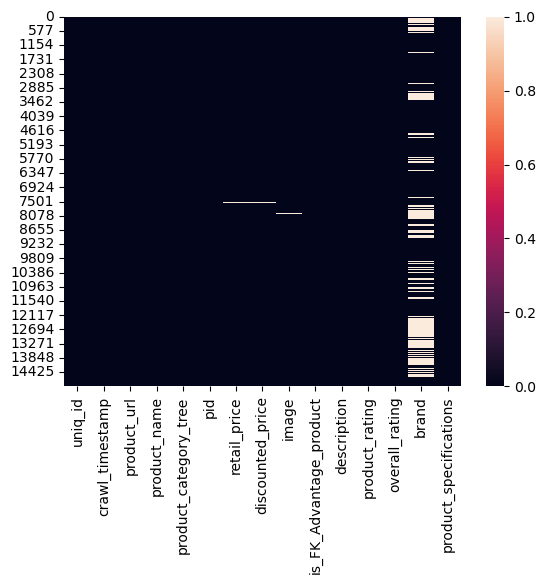

In [6]:
sns.heatmap(dataset.isnull())
plt.show()

In [7]:
dataset.drop(columns = ["brand"] , inplace = True)        #here we will drop column brand which has most no. of null values

In [8]:
dataset.dropna(inplace= True)    # here we will drop rows which consist of null values

In [9]:
dataset.shape              #dataset rows and columns after removing null values

(14934, 14)

In [10]:
dataset.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
product_specifications     0
dtype: int64

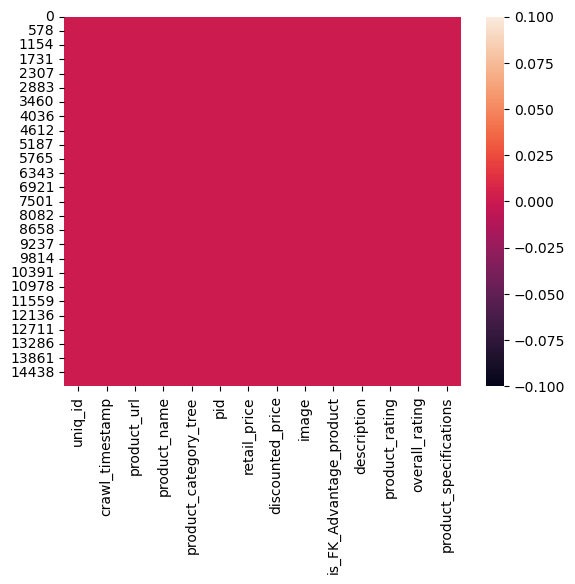

In [11]:
sns.heatmap(dataset.isnull())
plt.show()

In [12]:
dataset.info()     #this will provide datatypes of each columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14934 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14934 non-null  object 
 1   crawl_timestamp          14934 non-null  object 
 2   product_url              14934 non-null  object 
 3   product_name             14934 non-null  object 
 4   product_category_tree    14934 non-null  object 
 5   pid                      14934 non-null  object 
 6   retail_price             14934 non-null  float64
 7   discounted_price         14934 non-null  float64
 8   image                    14934 non-null  object 
 9   is_FK_Advantage_product  14934 non-null  bool   
 10  description              14934 non-null  object 
 11  product_rating           14934 non-null  object 
 12  overall_rating           14934 non-null  object 
 13  product_specifications   14934 non-null  object 
dtypes: bool(1), float64(2)

# STEP 4: Converting categorical data into numerical 

In [13]:
en_data= dataset[["product_category_tree","description"]]
pd.get_dummies(en_data).info() # converts categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14934 entries, 0 to 14998
Columns: 13119 entries, product_category_tree_Automotive  to description_zDelhi.com Car Washer Z1 Ultra High Pressure Washer
                         Price: Rs. 3,999
				
			The Portable Automatic Car Washer Is An Amazing High Pressure Product For Cleaning Around A Car Without Moving Yourself From The Distance Of 10 Feet. It Can Be Used For Gardening & Agriculture, Weed Killers, Pest Control, Nursery, Sanitary, Construction, And So Much More. The Washing Brush With A Internal Fan Nozzle Can Spray Water While Brushing The Car. The Hose With Strong Power Gun For Powerful Water Pressure. You Can Take The Product In Your Car Anywhere You Go. Its Portable And Can Be Used Just By Using Car Charger Plug, So Can Be Used On The Go. 16Liter Tank, Spray Gun, 6 Meter Hose, Washing Brush, Brush Connector, Power Cable with car socket charger.
The Portable Automatic Car Washer Is An Amazing High Pressure Product For Cleaning

In [14]:
dataset["product_category_tree"].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Computers '], dtype=object)

# Step 5: Converting Labels (y_train)


In [16]:
 from sklearn.preprocessing import LabelEncoder

In [17]:
 le= LabelEncoder()     #will convert the dependent column into numerical 
 dataset["en_product_category_tree"] = le.fit_transform(dataset["product_category_tree"])  

In [18]:
 dataset.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,en_product_category_tree
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",3
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",5
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",3
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",3
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,"{""product_specification""=>[{""key""=>""Occasion"",...",5


# step 6: Feature Engineering, Feature Selection and Train Test Split

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

In [27]:
X = dataset["description"]
y = dataset["product_category_tree"]


In [28]:
tfidf = TfidfVectorizer()             #independent feature is converted into vectorized form using tfidf
X_tfidf = tfidf.fit_transform(X)

#split the dataset into train and test 
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [29]:
x_train.shape ,y_train.shape

((11947, 20028), (11947,))

In [30]:
x_test.shape, y_test.shape

((2987, 20028), (2987,))

# Step 7: Model Selection 

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
#logistic regression model is selected for multinominal-classification problem
lr = LogisticRegression()   # object is created
lr.fit(x_train,y_train)     # model is applied into training dataset

LogisticRegression()

In [33]:
lr.score(x_test, y_test)*100       # and the score of test data is as  shown

96.91998660863743

In [38]:
prediction = lr.predict(tfidf.transform(["TheLostPuppy Back Cover for Apple iPad Air (Multicolor) Price: Rs. 599Designed To Protect And Impress. The Lost Puppy Brings You Robust Mobile Covers In All Sizes. With The Special Anti-Slip Technology This Protects Your Phone In More Ways Than One. The Matte Finish And Superior Quality Add Elegance, Class And Sturdiness To The Covers."]))


In [39]:
prediction             # predicted results

array(['Mobiles & Accessories '], dtype=object)

# Step 8: Fine Tuning using GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV
#for fine tuning and gridsearchcv hyperparameter is used for Exhaustiveness, Cross-Validation, Automation, Performance Improvement, Reproducibility

In [41]:
# Define the hyperparameter grid

parameters = {'C': [0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Set up Grid Search
grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5)

# Fit the model with Grid Search
grid_search.fit(x_train, y_train)

# Get the best parameters and score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

prediction = best_model.predict(tfidf.transform(["TheLostPuppy Back Cover for Apple iPad Air (Multicolor) Price: Rs. 599Designed To Protect And Impress. The Lost Puppy Brings You Robust Mobile Covers In All Sizes. With The Special Anti-Slip Technology This Protects Your Phone In More Ways Than One. The Matte Finish And Superior Quality Add Elegance, Class And Sturdiness To The Covers."]))


C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Best parameters found: {'C': 100, 'solver': 'lbfgs'}
Best score: 0.9812506414511419


C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Step 9: predictions and evaluations

Test Accuracy: 0.9829260127217945
Classification Report:
                             precision    recall  f1-score   support

                Automotive        0.98      0.99      0.99       202
                 Baby Care        0.94      0.89      0.91        36
     Bags, Wallets & Belts        1.00      0.95      0.97        41
                  Clothing        1.00      1.00      1.00      1051
                 Computers        0.96      0.97      0.96        95
                  Footwear        1.00      1.00      1.00       206
Home Decor & Festive Needs        0.98      0.97      0.97       126
                 Jewellery        1.00      1.00      1.00       668
          Kitchen & Dining        0.95      0.99      0.97       112
     Mobiles & Accessories        0.98      0.98      0.98       150
         Pens & Stationery        0.91      0.71      0.79        68
          Tools & Hardware        1.00      0.98      0.99        66
    Toys & School Supplies        0.70      0

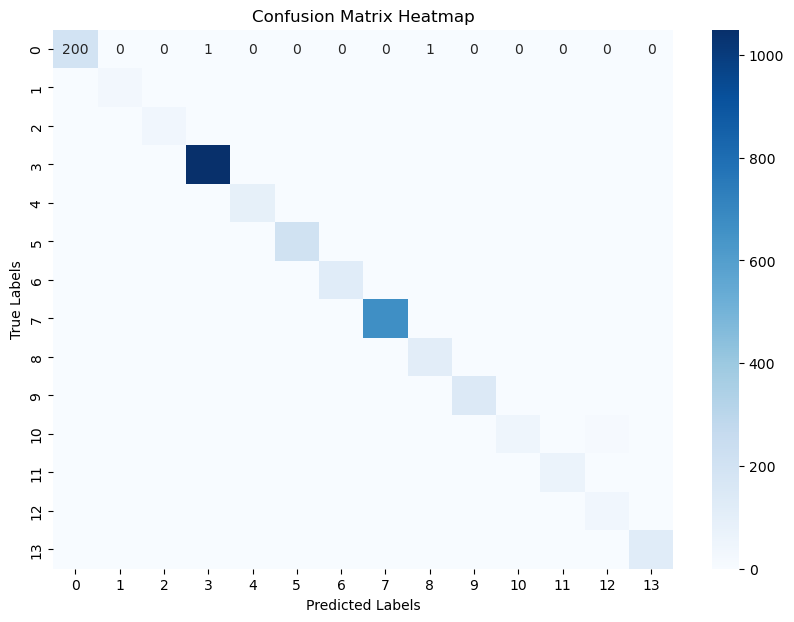

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on test data
y_pred = best_model.predict(x_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Save heatmap
plt.title("Confusion Matrix Heatmap")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.savefig("confusion_matrix_heatmap.png")
plt.show()


# Step :10 prediction on test data

In [44]:
import pandas as pd

# Load the CSV file
test_data = pd.read_csv('test_data.csv')

# Assuming the test data has the same structure as your training data
X_test_new = test_data['description']  # Adjust column name as needed

# Apply the same TF-IDF transformation
X_test_tfidf_new = tfidf.transform(X_test_new)

# Make predictions
predictions = best_model.predict(X_test_tfidf_new)

# Add predictions to the DataFrame
test_data['predictions'] = predictions

# Save the predictions to a new CSV file
test_data.to_csv('test_data_with_predictions.csv', index=False)

print("Predictions saved to test_data_with_predictions.csv")


Predictions saved to test_data_with_predictions.csv


# Step 11:prediction saved to test results file

In [48]:
import pandas as pd

# Load the CSV file
test_results = pd.read_csv('test_results.csv')

# Ensure the test data has the correct format
X_test_new = test_results['product_category_tree']  # Adjust column name if different

# Apply the same TF-IDF transformation
X_test_tfidf_new = tfidf.transform(X_test_new)

# Make predictions
predictions = best_model.predict(X_test_tfidf_new)

# Add predictions to the DataFrame
test_results['predictions'] = predictions

# Save the predictions to a new CSV file
test_results.to_csv('test_results_with_predictions.csv', index=False)

print("Predictions saved to test_results_with_predictions.csv")


Predictions saved to test_results_with_predictions.csv
